# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')
import matplotlib.mlab as mlab
import math

## Question 1

(array([ 4.,  5., 13., 14., 18., 24., 24., 14.,  9.,  5.]),
 array([57. , 60.2, 63.4, 66.6, 69.8, 73. , 76.2, 79.4, 82.6, 85.8, 89. ]),
 <a list of 10 Patch objects>)

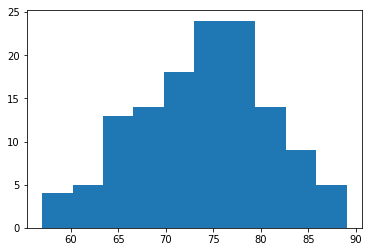

In [3]:
# Your work here.
plt.hist(df.heart_rate)

In [4]:
df.heart_rate.mean(), df.heart_rate.std()

(73.76153846153846, 7.062076737571354)

/home/yash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


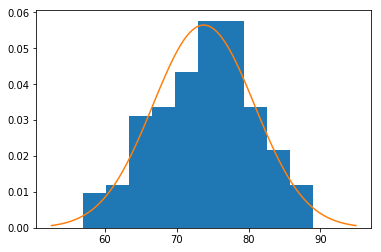

In [5]:
mu = df.heart_rate.mean()
# variance = 1
sigma = df.heart_rate.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a = plt.hist(df.heart_rate, density=True)
b = plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

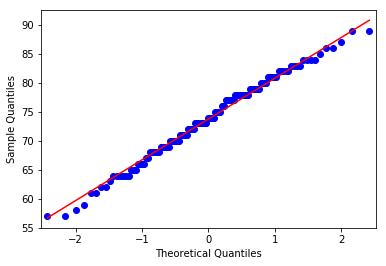

In [6]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# data = 5 * randn(100) + 50
# q-q plot
qqplot(df.heart_rate, line='s')
pyplot.show()

In [7]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(df.heart_rate)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.355
Sample looks Gaussian (fail to reject H0)


In [8]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(df.heart_rate)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.349, p=0.309
Sample looks Gaussian (fail to reject H0)


## Question 2

The sample size is 130. That is considerably large.

Also, according to the tests above, it seems that the observations are independent of each other.

In [9]:
df.shape

(130, 3)

In [10]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


In [11]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


## Question 3

1. H0 -> mean == 98.6
2. H1 -> mean != 98.6

In [12]:
test_mean = df.temperature.mean()
test_mean

98.24923076923078

In [13]:
new_temp = df.temperature - test_mean + 98.6

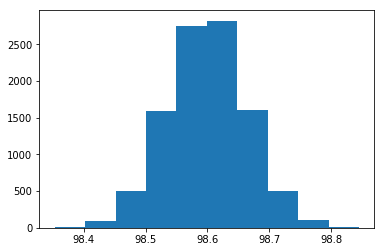

In [14]:
f = []
for i in range(10000):
    l = []
    for _ in range(130):
        l.append(new_temp[np.random.randint(130)])
    f.append(sum(l)/130)

plt.hist(f)
f = np.array(f)

In [15]:
diff = abs(98.6 - test_mean)

In [17]:
(sum(f < 98.6 - diff) + sum(f > 98.6 + diff))/10000

0.0

p-value < 0.05. Hence, null hypothesis rejected. Mean is not 98.6, according to bootstrap hypothesis test.

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the $t$ or $z$ statistic? 
Now try using the other test. How is the result be different? Why?

We would use a one-sample test, as one-sample test is used to consider population means versus a hypothesized value

In [18]:
from scipy import stats
from statsmodels.stats.weightstats import ztest
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [19]:
ztest(x1=df.temperature, x2=None, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

We can't do the z-test at all. This is because the z-test requires the population means which is not present to us.

In [20]:
stats.ttest_1samp(df.temperature[:10], 98.6)

Ttest_1sampResult(statistic=-0.17381774143072845, pvalue=0.8658554880730941)

In [21]:
ztest(x1=df.temperature[:10], x2=None, value=98.6)

(-0.17381774143072845, 0.8620087009904637)

## Question 5



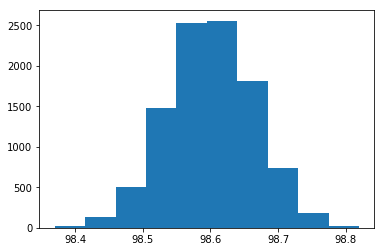

In [22]:
f = []
for i in range(10000):
    l = []
    for _ in range(130):
        l.append(new_temp[np.random.randint(130)])
    f.append(sum(l)/130)

plt.hist(f)
f = np.array(f)

In [25]:
np.percentile(f-diff, q=[2.5, 97.5])

array([98.12307692, 98.37461538])

In [36]:
ztest(x1=df.temperature, x2=None, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [27]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [29]:
df.temperature.max(), df.temperature.min()

(100.8, 96.3)

## Question 6

In [31]:
df_f = df[df['gender']=="F"]
df_m = df[df['gender']=="M"]

In [40]:
df_f.temperature.mean(), df_m.temperature.mean()

(98.39384615384613, 98.1046153846154)

(array([ 3.,  2.,  4., 12., 15., 20.,  6.,  1.,  1.,  1.]),
 array([ 96.4 ,  96.84,  97.28,  97.72,  98.16,  98.6 ,  99.04,  99.48,
         99.92, 100.36, 100.8 ]),
 <a list of 10 Patch objects>)

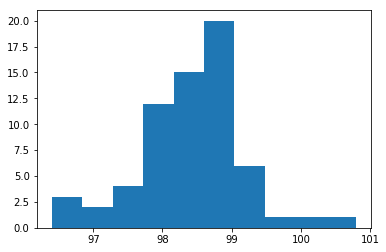

In [32]:
plt.hist(df_f.temperature)

(array([ 1.,  2.,  5.,  7.,  8., 14.,  8., 11.,  5.,  4.]),
 array([96.3 , 96.62, 96.94, 97.26, 97.58, 97.9 , 98.22, 98.54, 98.86,
        99.18, 99.5 ]),
 <a list of 10 Patch objects>)

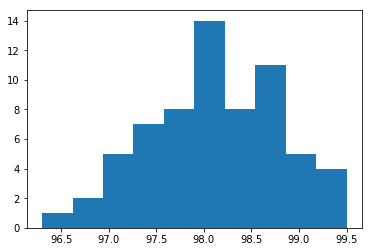

In [33]:
plt.hist(df_m.temperature)

In [37]:
ztest(df_m.temperature, df_f.temperature)

(-2.2854345381656103, 0.02228736076065755)

In [41]:
stats.ttest_ind(df_f.temperature, df_m.temperature, equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

Null hypothesis rejected. Therefore, there is a significant difference between the distribution of temperature in males and females